Philippe Joly 2025-06-11

# 1 Hz Data with respect to Plasma Freqeuency

This notebook explores the time evolution of power across various bands along with fluctuating ionosphere plasma frequency

In [16]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import sys
from os import path
sys.path.append(path.expanduser('~'))

In [18]:
# Load 1 Hz Data
# fn_dat  = "/project/s/sievers/philj0ly/xcorr_cpu/xcorr_all_ant_4bit_1721361571_458752_65536_14_6_7.npz"
fn_dat = '/project/s/sievers/philj0ly/xcorr_cpu/xcorr_all_ant_4bit_1721361671_458752_65536_55_47_48.npz'
with np.load(fn_dat) as f:
    data = f['data']
    mask = f['mask']
    missing_fraction = f['missing_fraction']
    chans = f['chans']

t0 = 1721361671
df_record = 125e6/2048 # (Hz) frequency range / # of channels
df = df_record/2**16
N = 458752

spectra = np.ma.MaskedArray(data=data, mask=mask)
freqs = chans*df 

times = N/df_record*np.arange(48)+t0
times = pd.to_datetime(times, unit='s')

print(f"Loaded {freqs.shape[0]} {df:.3f} Hz frequency channels from {freqs[0]:.1f} to {freqs[-1]:.1f} Hz between {times[0]} and {times[-1]} ({times.shape[0]} divisions)")

# Load A-CHAIM Data
fn_plasma = "/project/s/sievers/philj0ly/CHAIM/CSV/ACHAIM_nmf2.csv"
achaim = pd.read_csv(fn_plasma)
   
achaim["datetime"] = pd.to_datetime(achaim["datetime"], format="%y%m%d_%H%M%S")
achaim = achaim[(achaim['datetime'] >= times[0]) & (achaim['datetime'] <= times[-1])].copy()

if len(achaim) == 0:
    raise ValueError(f"No plasma frequency data between {times[0]} and {times[-1]}")
else:
    print(f"Loaded {len(achaim)} Plasma frequency Data points from {times[0]} to {times[-1]}")

Loaded 65536 0.931 Hz frequency channels from 6774902.3 to 6835936.6 Hz between 2024-07-19 04:01:11 and 2024-07-19 04:07:04.261059999 (48 divisions)
Loaded 1 Plasma frequency Data points from 2024-07-19 04:01:11 to 2024-07-19 04:07:04.261059999


##  Data Visualisation

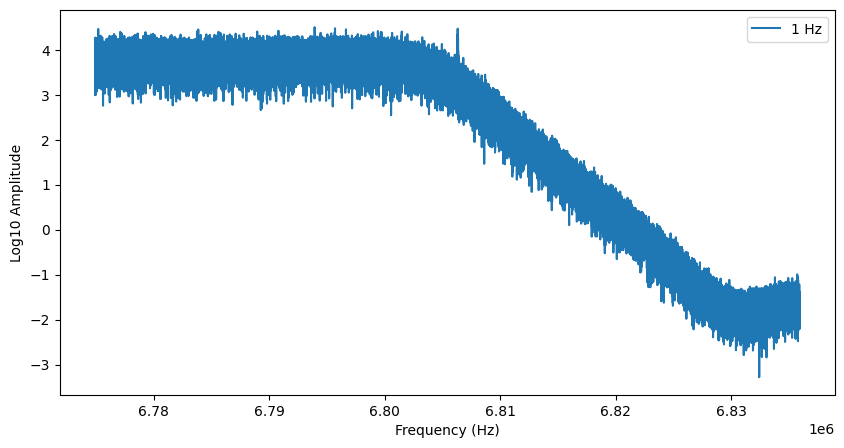

In [20]:
t = 203

plt.figure(figsize=(10,5))
 
plt.plot(freqs, np.log10(np.abs(spectra[0,0,:,1])), label="1 Hz")


# plt.ylim(0,5)
dx = 60
x0 = 4.32e6
# plt.xlim(x0,x0+dx)
plt.xlabel('Frequency (Hz)')   
plt.ylabel('Log10 Amplitude')
plt.legend()

plt.show()

In [9]:
freqs[0]/df_record-64

np.float64(6.0)

This plot illustrates data amplitude across frequencies at particular times comparing the Orginal data from Mohan and my cpu as well as gpu implementation of xcorr re_pfb pipelines.

In [6]:
f = 10

plt.figure(figsize=(15,10))
for i in range(2):    
    plt.plot(times, np.log10(np.abs(spectra[i,0,0,f,:])), label=pu[i])

plt.plot(times, np.log10(np.abs(spectra_og[0,0,f,:])), label="Original")

plt.xlabel('Time (s)')   
plt.ylabel('Log10 Amplitude')
plt.legend()

plt.show()

IndexError: too many indices for array: array is 4-dimensional, but 5 were indexed

<Figure size 1500x1000 with 0 Axes>

This plot illustrates the data's amplitude at given frequencies across time comparing the Orginal data from Mohan and my cpu as well as gpu implementation of xcorr re_pfb pipelines.

Note that, as expected the GPU and CPU implementation match exactly the results from Mohan.